In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
corr_matrix = df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

c:\users\91763\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\91763\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\91763\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C12724F860>,
      dtype=object)

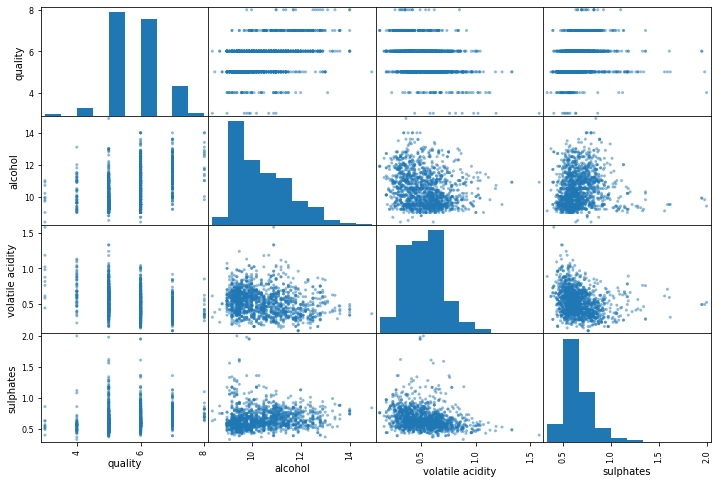

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["quality","alcohol", "volatile acidity", "sulphates"]
scatter_matrix(df[attributes],figsize=(12,8))

# Binary Classifier

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [21]:
y = df['quality']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [23]:
len(X_train)

1119

In [27]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [29]:
y_test_5.head()

1254     True
1087    False
822      True
1514    False
902     False
Name: quality, dtype: bool

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

In [32]:
clf.fit(X_train, y_train_5)

c:\users\91763\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1254,7.8,0.700,0.06,1.9,0.079,20.0,35.0,0.99628,3.40,0.69,10.900000
1087,7.9,0.190,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.200000
822,6.7,0.540,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.800000
1514,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
902,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.800000
...,...,...,...,...,...,...,...,...,...,...,...
430,10.5,0.240,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.000000
1273,7.5,0.580,0.20,2.0,0.073,34.0,44.0,0.99494,3.10,0.43,9.300000
675,9.3,0.410,0.39,2.2,0.064,12.0,31.0,0.99840,3.26,0.65,10.200000
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.500000


In [41]:
y_test_5

1254     True
1087    False
822      True
1514    False
902     False
        ...  
430     False
1273     True
675      True
1235    False
4        True
Name: quality, Length: 480, dtype: bool

In [49]:
predictions = clf.predict(X_test)

In [50]:
predictions

array([False, False,  True,  True, False, False,  True, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,

In [51]:
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve

In [54]:
cm = confusion_matrix(y_test_5, predictions)

In [55]:
cm

array([[227,  49],
       [ 73, 131]], dtype=int64)

In [57]:
precision_score(y_test_5, predictions)

0.7277777777777777

# Trying some Polynomial regression

In [98]:
from random import choice

In [99]:
noise = [i for i in range(100000)]

In [100]:
x = [i for i in range(10,500)]

In [101]:
y = [i*i + 100*i-3 + choice(noise) for i in x]

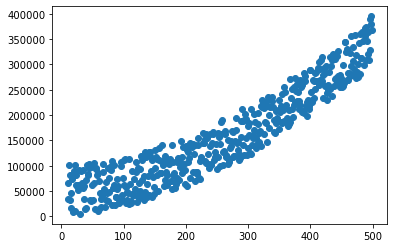

In [102]:
plt.scatter(x,y)

In [103]:
X = pd.DataFrame()

In [104]:
X['A'] = np.array(x)
X['sqr'] = np.array([i*i for i in x])

In [105]:
Y = pd.DataFrame()
Y['result'] = np.array(y)

In [106]:
Y

,result
0,65220
1,34485
2,100632
3,80871
4,32941
...,...
485,389801
486,327876
487,379149
488,395285


In [107]:
X

,A,sqr
0,10,100
1,11,121
2,12,144
3,13,169
4,14,196
...,...,...
485,495,245025
486,496,246016
487,497,247009
488,498,248004


In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression()

In [110]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
model.coef_

array([[37.32652359,  1.11864666]])

In [112]:
model.intercept_

array([53558.50406477])

In [113]:
pred = model.predict(X)

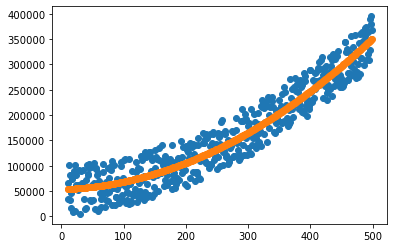

In [114]:
plt.scatter(x,y)
plt.scatter(x,pred)

# Try again

In [1]:
from random import choice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
noise = [i for i in range(100000)]
x = [i for i in range(10,500)]
y = [i*i*i + 5*i*i-3 for i in x]

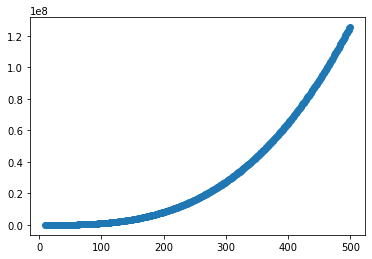

In [5]:
plt.scatter(x,y)

In [6]:
X = pd.DataFrame()
X['A'] = np.array(x)
X['cube'] = np.array([i*i*i for i in x])
X['sqr'] = np.array([i*i for i in x])

In [7]:
Y = pd.DataFrame()
Y['result'] = np.array(y)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([[5.18582596e-11, 1.00000000e+00, 5.00000000e+00]])

In [11]:

test = pd.DataFrame()

In [12]:
test['A'] = np.array([i for i in range(400,600)])
test['cube'] = np.array([i*i*i for i in range(400,600)])
test['sqr'] = np.array([i*i for i in range(400,600)])

In [13]:
pred = model.predict(test)

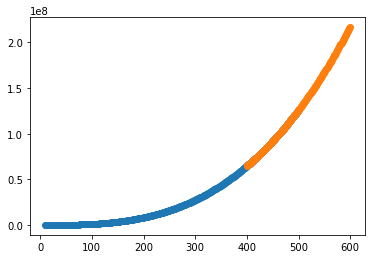

In [14]:
plt.scatter(x,y)
plt.scatter(test['A'], pred)